In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取上传的Excel文件
file_path = 'D:/桌面/weather(1).xlsx'
data = pd.read_excel(file_path)

# 显示数据的前几行以了解其结构
print("原始数据：")
print(data.head())


原始数据：
                日期 最高气温  最低气温  天气    风向  风力      日照时数  空气质量指数
0  2021-01-01 星期五    0℃  -11℃   晴  东北风   2级  09:24:14      55
1  2021-01-02 星期六    0℃   -9℃   晴  东北风   2级  09:24:58      72
2  2021-01-03 星期日    0℃   -7℃  多云  东北风   2级  09:25:46      30
3  2021-01-04 星期一   -1℃  -11℃   晴   北风   3级  09:26:38      37
4  2021-01-05 星期二   -2℃  -11℃   晴  西北风   3级  09:27:32      28


In [3]:
# 对列名进行清洗
data.columns = ['Date', 'MaxTemp', 'MinTemp', 'Weather', 'WindDir', 'WindForce', 'SunshineHours', 'AirQualityIndex']

# 确保相关列为字符串类型
data['MaxTemp'] = data['MaxTemp'].astype(str)
data['MinTemp'] = data['MinTemp'].astype(str)
data['SunshineHours'] = data['SunshineHours'].astype(str)
data['Date'] = data['Date'].astype(str)

# 去除温度中的异常字符并转换为数值类型
data['MaxTemp'] = data['MaxTemp'].str.replace('℃', '').astype(float)
data['MinTemp'] = data['MinTemp'].str.replace('℃', '').astype(float)
data['SunshineHours'] = data['SunshineHours'].str.replace(':', '').astype(float)
data['Date'] = data['Date'].str.split().str[0]
data['Date'] = data['Date'].str.replace('-', '')

# 将日期转换为datetime格式
# 显示清洗后的数据
print("清洗后的数据：")
print(data.head())

# 保存清洗后的数据到新的Excel文件
cleaned_file_path = 'D:/桌面/cleaned_weather.xlsx'
data.to_excel(cleaned_file_path, index=False)

print(f"清洗后的数据已保存到 {cleaned_file_path}")

清洗后的数据：
       Date  MaxTemp  MinTemp Weather WindDir WindForce  SunshineHours  \
0  20210101      0.0    -11.0       晴    东北风         2级        92414.0   
1  20210102      0.0     -9.0       晴    东北风         2级        92458.0   
2  20210103      0.0     -7.0      多云    东北风         2级        92546.0   
3  20210104     -1.0    -11.0       晴     北风         3级        92638.0   
4  20210105     -2.0    -11.0       晴    西北风         3级        92732.0   

   AirQualityIndex  
0               55  
1               72  
2               30  
3               37  
4               28  
清洗后的数据已保存到 D:/桌面/cleaned_weather.xlsx


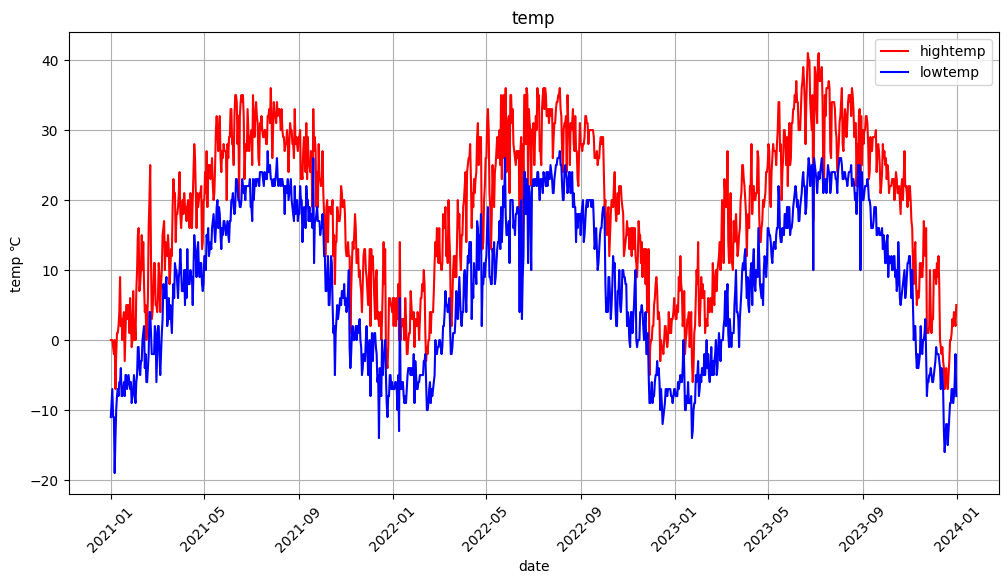

In [4]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# 设置日期为索引
data.set_index('Date', inplace=True)

# 绘制最高和最低温度变化趋势图
plt.figure(figsize=(12, 6))
plt.plot(data['MaxTemp'], label='hightemp', color='red')
plt.plot(data['MinTemp'], label='lowtemp', color='blue')
plt.xlabel('date')
plt.ylabel('temp ℃')
plt.title('temp')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

f:\python3\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


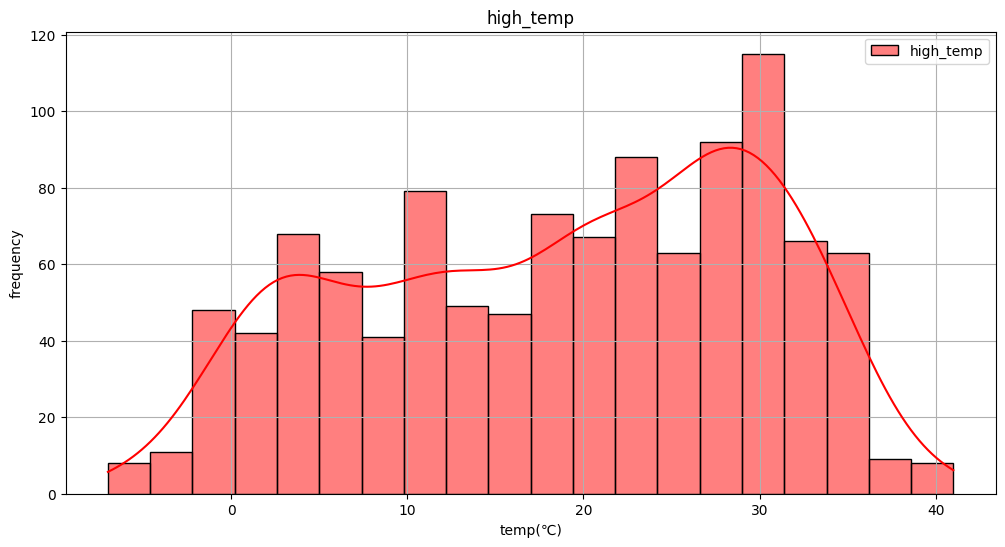

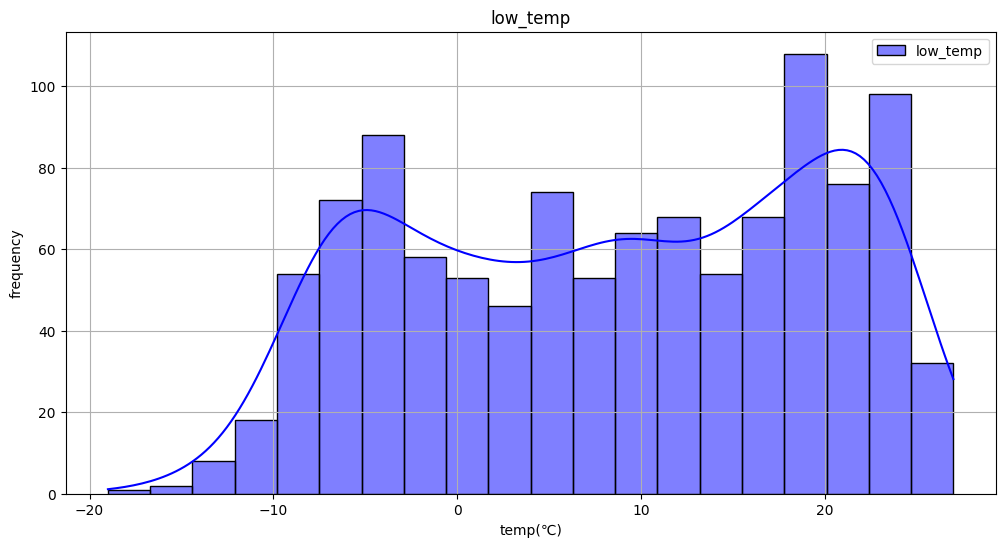

In [5]:
import seaborn as sns

# 绘制最高温度分布的直方图和核密度图
plt.figure(figsize=(12, 6))
sns.histplot(data['MaxTemp'], kde=True, color='red', label='high_temp', bins=20)
plt.xlabel('temp(℃)')
plt.ylabel('frequency')
plt.title('high_temp')
plt.legend()
plt.grid(True)
plt.show()

# 绘制最低温度分布的直方图和核密度图
plt.figure(figsize=(12, 6))
sns.histplot(data['MinTemp'], kde=True, color='blue', label='low_temp', bins=20)
plt.xlabel('temp(℃)')
plt.ylabel('frequency')
plt.title('low_temp')
plt.legend()
plt.grid(True)
plt.show()

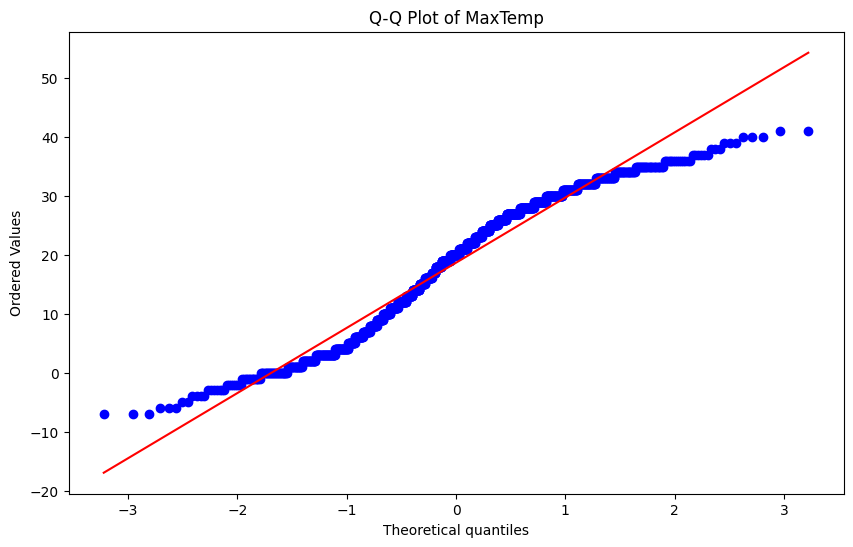

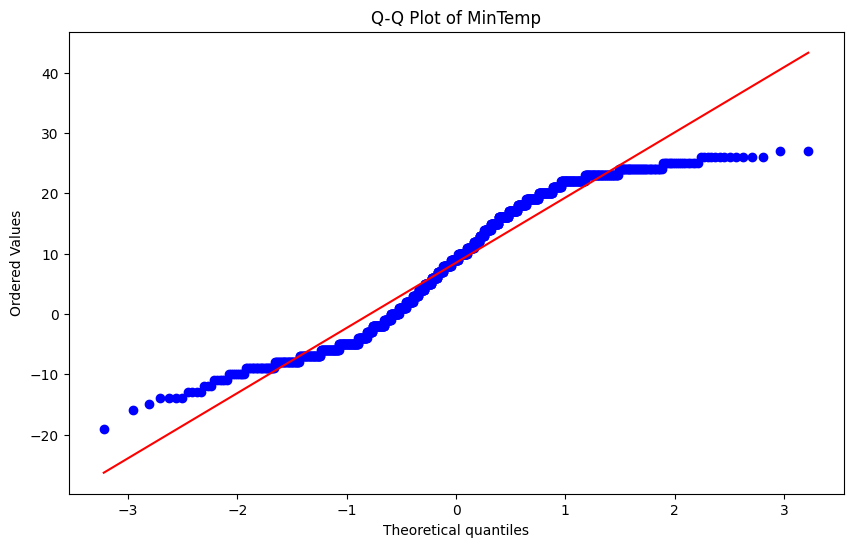

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
# 绘制最高温度的QQ图
plt.figure(figsize=(10, 6))
stats.probplot(data['MaxTemp'], dist="norm", plot=plt)
plt.title('Q-Q Plot of MaxTemp')
plt.show()

# 绘制最低温度的QQ图
plt.figure(figsize=(10, 6))
stats.probplot(data['MinTemp'], dist="norm", plot=plt)
plt.title('Q-Q Plot of MinTemp')
plt.show()

Optimal lambda for MaxTemp: 1.2436605308674733


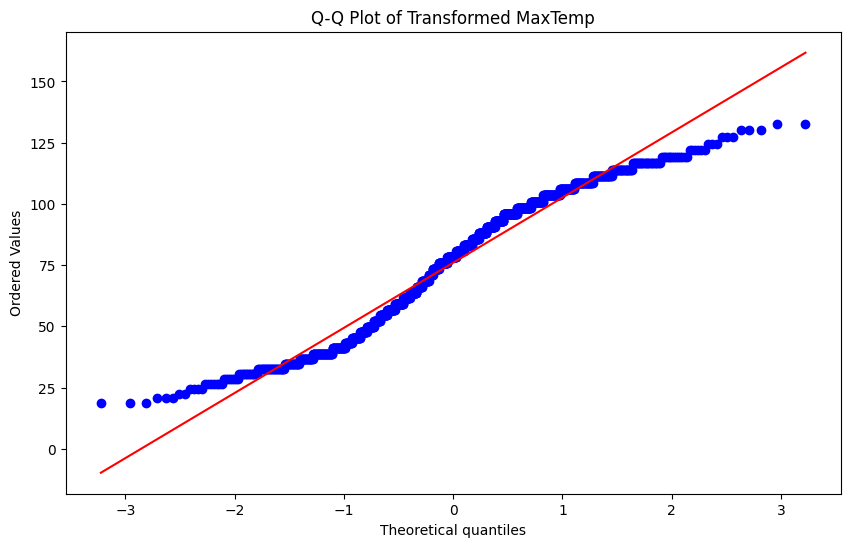

Optimal lambda for MinTemp: 0.9237579496836252


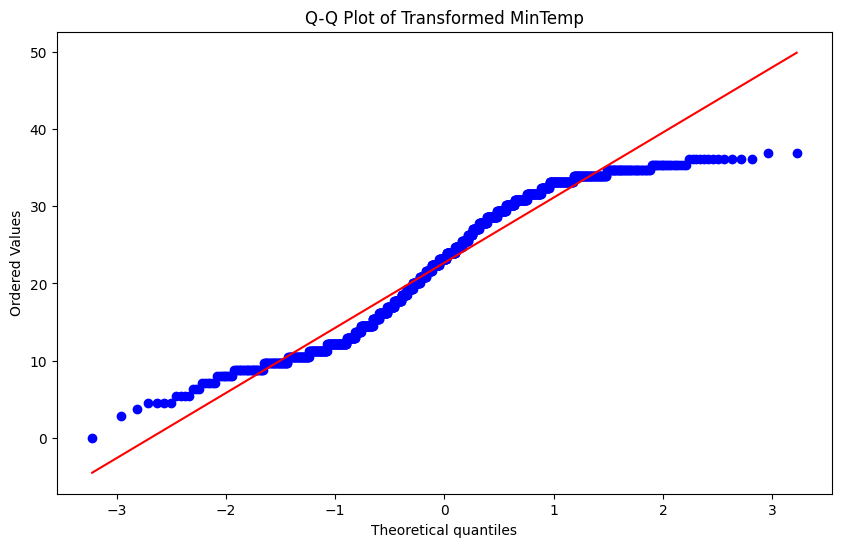

In [7]:
from scipy.stats import boxcox
data['MaxTemp_transformed'], max_temp_lambda = boxcox(data['MaxTemp'] + 20)  # 加1以处理可能的0值
print(f'Optimal lambda for MaxTemp: {max_temp_lambda}')

# 绘制变换后的最高温度的QQ图
plt.figure(figsize=(10, 6))
stats.probplot(data['MaxTemp_transformed'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed MaxTemp')
plt.show()

# 对最低温度进行Box-Cox变换
data['MinTemp_transformed'], min_temp_lambda = boxcox(data['MinTemp'] + 20)  # 加1以处理可能的0值
print(f'Optimal lambda for MinTemp: {min_temp_lambda}')

# 绘制变换后的最低温度的QQ图
plt.figure(figsize=(10, 6))
stats.probplot(data['MinTemp_transformed'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed MinTemp')
plt.show()

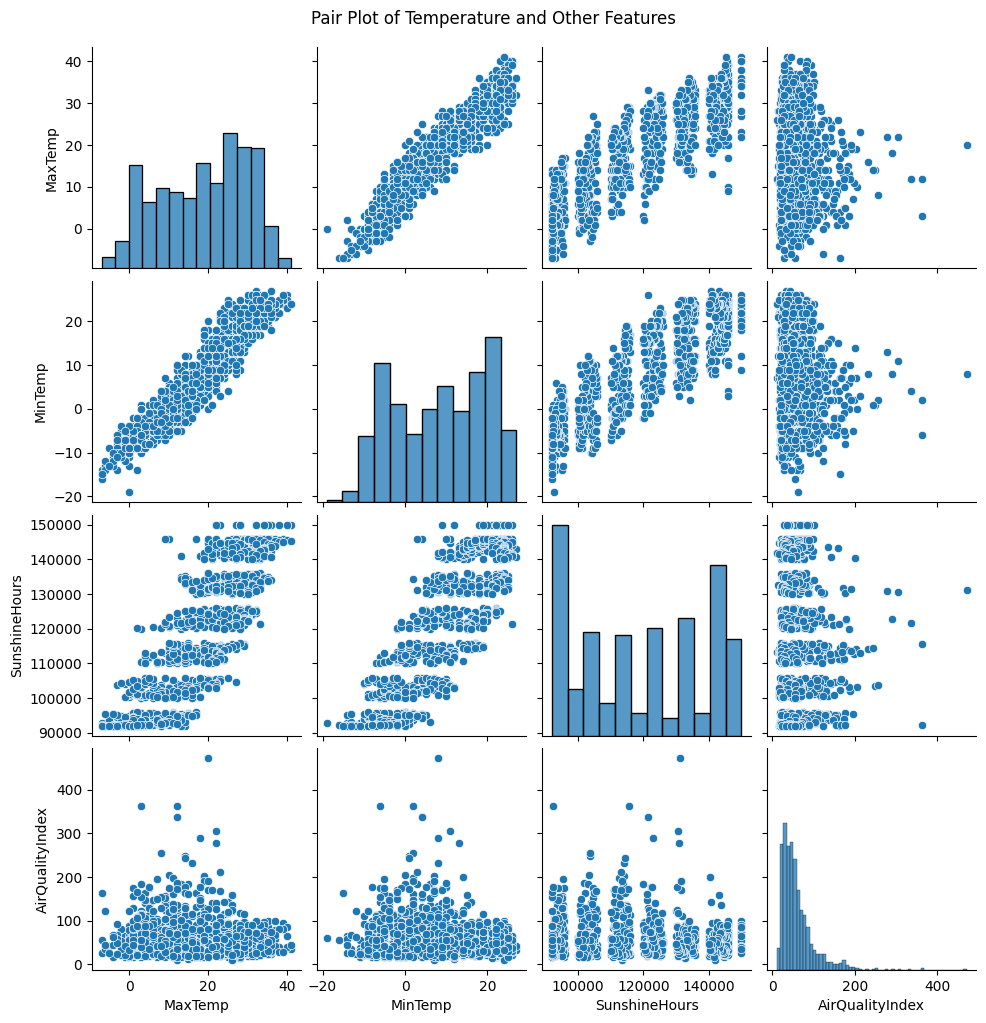

In [8]:

sns.pairplot(data, vars=['MaxTemp', 'MinTemp', 'SunshineHours', 'AirQualityIndex'], kind='scatter')
plt.suptitle('Pair Plot of Temperature and Other Features', y=1.02)
plt.show()


Test Statistic                   -1.741891
p-value                           0.409668
#Lags Used                       13.000000
Number of Observations Used    1081.000000
Critical Value (1%)              -3.436414
Critical Value (5%)              -2.864217
Critical Value (10%)             -2.568196
dtype: float64


f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\python3\Lib\site-packages\statsmodels\tsa\

Best ARIMA parameters: (2, 2, 2) with AIC 6014.854360857906


f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 13.420019436729829
Mean Absolute Error: 2.7712355991833495
R-squared: 0.9051200305748932


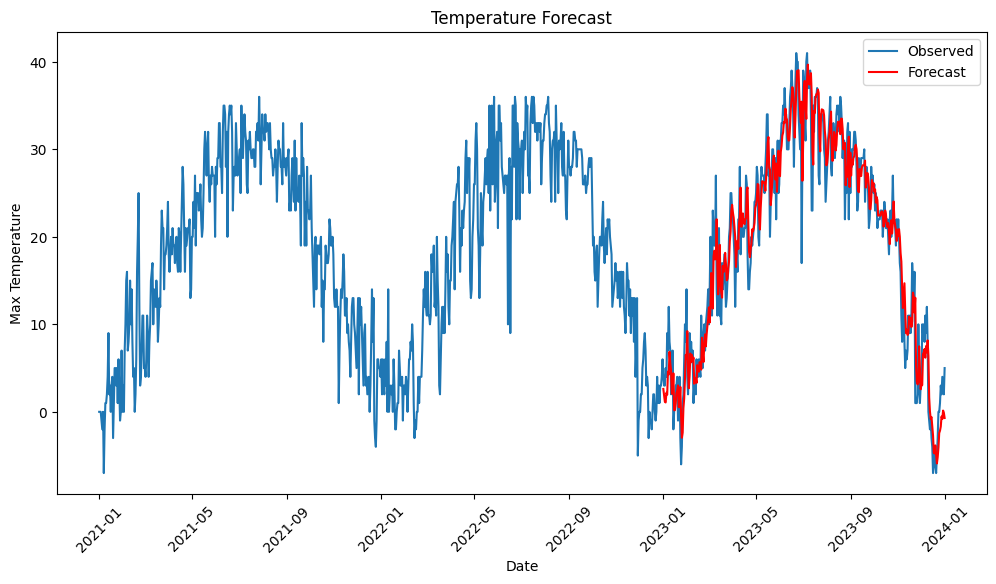

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from itertools import product



# 确保温度列为数值类型
data['MaxTemp'] = pd.to_numeric(data['MaxTemp'], errors='coerce')
data['MaxTemp_diff'] = data['MaxTemp'].diff().dropna()

# 检查数据的平稳性
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(data['MaxTemp'].dropna())

# 参数优化
p = d = q = range(0, 3)
pdq = list(product(p, d, q))

best_aic = np.inf
best_pdq = None

for param in pdq:
    try:
        model = ARIMA(data['MaxTemp'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print(f'Best ARIMA parameters: {best_pdq} with AIC {best_aic}')

# 用最佳参数拟合模型
model = ARIMA(data['MaxTemp'], order=best_pdq)
result_1 = model.fit()

# 预测2023年全年
start_date = '2023-01-01'
end_date = '2023-12-31'
pred_1 = result_1.predict(start=start_date, end=end_date)

# 模型评估
y_true = data['MaxTemp'][-len(pred_1):]
mse = mean_squared_error(y_true, pred_1)
mae = mean_absolute_error(y_true, pred_1)
r2 = r2_score(y_true, pred_1)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
# 绘制结果
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.plot(data['MaxTemp'], label='Observed')
plt.plot(pred_1, label='Forecast', color='red')
plt.legend()
plt.title('Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.show()

Test Statistic                   -1.617387
p-value                           0.474099
#Lags Used                       17.000000
Number of Observations Used    1077.000000
Critical Value (1%)              -3.436436
Critical Value (5%)              -2.864227
Critical Value (10%)             -2.568201
dtype: float64


f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\python3\Lib\site-packages\statsmodels\tsa\

Best ARIMA parameters: (1, 2, 2) with AIC 5382.225804179594


f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\python3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
f:\python3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error: 6.525056010550435
Mean Absolute Error: 1.8798206510930684
R-squared: 0.9506433514143551


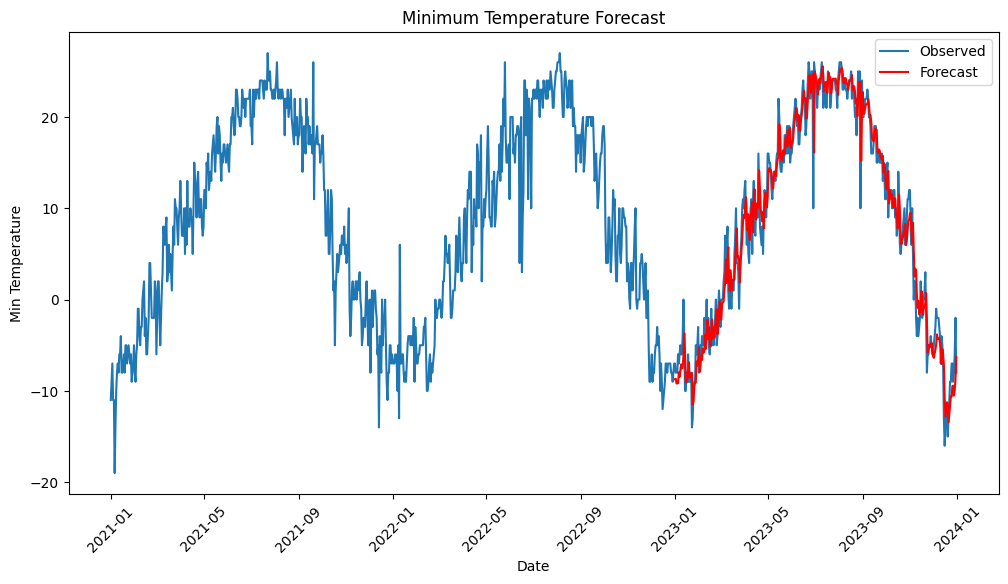

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from itertools import product

# 确保温度列为数值类型
data['MinTemp'] = pd.to_numeric(data['MinTemp'], errors='coerce')
data['MinTemp_diff'] = data['MinTemp'].diff().dropna()

# 检查数据的平稳性
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(data['MinTemp'].dropna())

# 参数优化
p = d = q = range(0, 3)
pdq = list(product(p, d, q))

best_aic = np.inf
best_pdq = None

for param in pdq:
    try:
        model = ARIMA(data['MinTemp'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print(f'Best ARIMA parameters: {best_pdq} with AIC {best_aic}')

# 用最佳参数拟合模型
model = ARIMA(data['MinTemp'], order=best_pdq)
result_1 = model.fit()

# 预测2023年全年
start_date = '2023-01-01'
end_date = '2023-12-31'
pred_1 = result_1.predict(start=start_date, end=end_date)

# 模型评估
y_true = data['MinTemp'][-len(pred_1):]
mse = mean_squared_error(y_true, pred_1)
mae = mean_absolute_error(y_true, pred_1)
r2 = r2_score(y_true, pred_1)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# 绘制结果
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.plot(data['MinTemp'], label='Observed')
plt.plot(pred_1, label='Forecast', color='red')
plt.legend()
plt.title('Minimum Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Min Temperature')
plt.show()
